# **Spotify Song Clustering**

# **Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.cluster import KMeans

# **Connect to spotify API**

In [2]:
client_id = 'INPUT_YOUR_CLIENT_ID'
client_secret = 'INPUT_YOUR_CLIENT_SECRET'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# **Get the Song**

**Get Track IDs**

In [3]:
def show_tracks(results, uriArray):
    for i, item in enumerate(results['items']):
        track = item['track']
        uriArray.append(track['id'])

In [4]:
def track_id(username, playlist_id):
    trackID = []
    results = sp.user_playlist(username, playlist_id)
    tracks = results['tracks']
    show_tracks(tracks, trackID)
    while tracks['next']:
        tracks = sp.next(tracks)
        show_tracks(tracks, trackID)
    return trackID

**Get Track Features data**

In [5]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity, 
             acousticness, danceability, energy, instrumentalness, liveness, loudness, 
             speechiness, tempo, time_signature]
    return track

**Main**

In [6]:
def main_func(playlist_creator, playlist_uri, filename):
    ids = track_id(playlist_creator, playlist_uri)
    
    # get track by track ids
    tracks = []
    for i in range(len(ids)):
        track = getTrackFeatures(ids[i])
        tracks.append(track)
        dff = pd.DataFrame(tracks, columns = [
            'name', 'album', 'artist', 'release_date', 'length', 'popularity', 
            'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
            'speechiness', 'tempo', 'time_signature'])
        
        # save to csv
        dff.to_csv(filename+".csv", sep = ',', index=False)
    return dff

**How to get spotify playlist username/creator and playlist uri? Just look at this picture below**

In [7]:
df1 = main_func('Spotify', '5Qnr7ct4jZ4ad1yDRuM1to', 'playlist_1')
# Nick 2022 Playlist

In [8]:
df2 = main_func('Spotify', '6r1emhnOzoFEi8OlVHszLw', 'playlist_2')
# Pat 2023 Playlist

**Import the playlist**

Used two playlists, one with many songs i like, another with fewer song that i really like, 1st uri and 2nd uri.
to get uri click share > copy link and paste area in center

In [9]:
df1 = pd.read_csv('playlist_1.csv')

In [10]:
df1.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Glad To Be Here,Friday Pilots Club,Friday Pilots Club,2021-05-07,218025,36,0.281,0.526,0.381,0.0000,0.194,-7.582,0.0403,175.443,4
1,Wrong Crowd,Wrong Crowd (Expanded Edition),Tom Odell,2016-06-10,266786,46,0.366,0.738,0.751,0.1970,0.111,-7.101,0.0508,117.988,4
2,Can I Leave Me Too?,Dandelion,The Greeting Committee,2021-09-24,223800,43,0.140,0.439,0.771,0.0014,0.621,-4.737,0.0467,119.943,4
3,Constellations,Wrong Crowd (Expanded Edition),Tom Odell,2016-06-10,274680,44,0.938,0.485,0.156,0.0000,0.132,-9.792,0.0426,128.468,1
4,Sparrow,Wrong Crowd (Expanded Edition),Tom Odell,2016-06-10,294986,49,0.174,0.573,0.465,0.0403,0.185,-9.648,0.0587,138.334,4


In [11]:
df2 = pd.read_csv('playlist_2.csv')

In [12]:
df2.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Nightlife,Home,Off With Their Heads,2013-03-12,149506,51,0.000715,0.403,0.987,0.000005,0.6600,-3.255,0.0872,103.768,4
1,Clear The Air,In Desolation,Off With Their Heads,2010-06-08,227000,47,0.001090,0.358,0.956,0.046800,0.2980,-4.473,0.0852,180.049,4
2,Revolution,Andiamo (Explicit Content U.S. Version),Authority Zero,2004-06-29,144666,49,0.002540,0.627,0.963,0.000000,0.0893,-3.393,0.0397,103.972,4
3,Kate Is Great,The Bouncing Souls,The Bouncing Souls,1997-09-23,173400,44,0.082200,0.358,0.930,0.000000,0.0699,-4.726,0.1640,175.011,4
4,Coin Toss Girl,Comet,The Bouncing Souls,2012-06-12,245840,30,0.001080,0.538,0.800,0.000005,0.1640,-5.320,0.0304,147.978,4


# **Data Preparation**

**Concatinating two playlists**

In [13]:
df = pd.concat([df1,df2], axis=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 77
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              125 non-null    object 
 1   album             125 non-null    object 
 2   artist            125 non-null    object 
 3   release_date      125 non-null    object 
 4   length            125 non-null    int64  
 5   popularity        125 non-null    int64  
 6   acousticness      125 non-null    float64
 7   danceability      125 non-null    float64
 8   energy            125 non-null    float64
 9   instrumentalness  125 non-null    float64
 10  liveness          125 non-null    float64
 11  loudness          125 non-null    float64
 12  speechiness       125 non-null    float64
 13  tempo             125 non-null    float64
 14  time_signature    125 non-null    int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 15.6+ KB


**Check redudancy data**

In [15]:
duplicate = pd.concat(g for _, g in df.groupby('name') if len(g) > 1)
#need to change this so it wont fail if there are none

ValueError: No objects to concatenate

In [ ]:
duplicate

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
71,"""45""",Handwritten,The Gaslight Anthem,2012-01-01,202493,55,0.000696,0.315,0.970,0.000000,0.2770,-4.709,0.1020,178.068,4
1844,"""45""",Handwritten,The Gaslight Anthem,2012-01-01,202493,55,0.000696,0.315,0.970,0.000000,0.2770,-4.709,0.1020,178.068,4
68,"1,000 Years",Get Hurt,The Gaslight Anthem,2014-08-12,218706,29,0.006170,0.334,0.896,0.000033,0.0763,-4.844,0.0463,131.812,5
1829,"1,000 Years",Get Hurt,The Gaslight Anthem,2014-08-12,218706,29,0.006170,0.334,0.896,0.000033,0.0763,-4.844,0.0463,131.812,5
17,A Quick Death in Texas,Psychic Warfare,Clutch,2015-10-02,237451,46,0.057500,0.590,0.925,0.000000,0.3640,-5.622,0.0479,93.944,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,You Shook Me All Night Long,Back In Black,AC/DC,1980-07-25,210173,86,0.002870,0.532,0.767,0.000513,0.3900,-5.509,0.0574,127.361,4
2030,You Spin Me Round (Like a Record),Evolution: The Hits,Dead Or Alive,1983,195146,78,0.000244,0.554,0.963,0.070200,0.4310,-3.762,0.0350,128.175,4
2145,You Spin Me Round (Like a Record),Stranger Things: Soundtrack from the Netflix S...,Various Artists,2022-07-01,194760,37,0.000130,0.558,0.944,0.015900,0.4050,-5.121,0.0339,128.131,4
21,¿Viva La Gloria? (Little Girl),21st Century Breakdown,Green Day,2009-05-15,227680,57,0.025200,0.519,0.845,0.000002,0.0922,-4.415,0.0281,94.955,4


**Sort df by name**

In [16]:
df = df.sort_values('name')

In [17]:
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
71,"""45""",Handwritten,The Gaslight Anthem,2012-01-01,202493,55,0.000696,0.315,0.970,0.000000,0.2770,-4.709,0.1020,178.068,4
68,"1,000 Years",Get Hurt,The Gaslight Anthem,2014-08-12,218706,29,0.006170,0.334,0.896,0.000033,0.0763,-4.844,0.0463,131.812,5
17,A Quick Death in Texas,Psychic Warfare,Clutch,2015-10-02,237451,46,0.057500,0.590,0.925,0.000000,0.3640,-5.622,0.0479,93.944,4
61,A Tornado Warning,A Long Way from Your Heart,Turnpike Troubadours,2017-10-20,223365,60,0.002530,0.478,0.833,0.000063,0.0567,-5.194,0.0355,141.976,4
16,Alive,Half Drunk Under a Full Moon (Deluxe),The Fratellis,2022-04-22,245080,31,0.079900,0.555,0.865,0.000000,0.2520,-5.409,0.0396,123.065,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,bangbangbang,bangbangbang,Deal Casino,2019-08-02,392970,46,0.004480,0.300,0.646,0.345000,0.4650,-12.712,0.0421,83.381,4
10,concussion,concussion,girlhouse,2021-08-27,277142,55,0.801000,0.554,0.477,0.005520,0.0944,-8.335,0.0247,167.973,4
28,i miss myself,i miss myself,renforshort,2022-06-23,222400,0,0.135000,0.426,0.404,0.000631,0.1030,-7.338,0.0322,149.739,4
32,not my friend,dear amelia,renforshort,2022-07-08,167441,24,0.845000,0.521,0.370,0.000043,0.1890,-10.043,0.1310,171.952,4


**Drop duplicate song**

In [18]:
df = df.drop_duplicates(subset='name') #default keep: first

In [19]:
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
71,"""45""",Handwritten,The Gaslight Anthem,2012-01-01,202493,55,0.000696,0.315,0.970,0.000000,0.2770,-4.709,0.1020,178.068,4
68,"1,000 Years",Get Hurt,The Gaslight Anthem,2014-08-12,218706,29,0.006170,0.334,0.896,0.000033,0.0763,-4.844,0.0463,131.812,5
17,A Quick Death in Texas,Psychic Warfare,Clutch,2015-10-02,237451,46,0.057500,0.590,0.925,0.000000,0.3640,-5.622,0.0479,93.944,4
61,A Tornado Warning,A Long Way from Your Heart,Turnpike Troubadours,2017-10-20,223365,60,0.002530,0.478,0.833,0.000063,0.0567,-5.194,0.0355,141.976,4
16,Alive,Half Drunk Under a Full Moon (Deluxe),The Fratellis,2022-04-22,245080,31,0.079900,0.555,0.865,0.000000,0.2520,-5.409,0.0396,123.065,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,bangbangbang,bangbangbang,Deal Casino,2019-08-02,392970,46,0.004480,0.300,0.646,0.345000,0.4650,-12.712,0.0421,83.381,4
10,concussion,concussion,girlhouse,2021-08-27,277142,55,0.801000,0.554,0.477,0.005520,0.0944,-8.335,0.0247,167.973,4
28,i miss myself,i miss myself,renforshort,2022-06-23,222400,0,0.135000,0.426,0.404,0.000631,0.1030,-7.338,0.0322,149.739,4
32,not my friend,dear amelia,renforshort,2022-07-08,167441,24,0.845000,0.521,0.370,0.000043,0.1890,-10.043,0.1310,171.952,4


# **Make Model**

**Dataset**

In [20]:
dataset = df.drop(['name', 'album', 'artist', 'release_date'], axis=1)

In [21]:
dataset.head()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
71,202493,55,0.000696,0.315,0.970,0.000000,0.2770,-4.709,0.1020,178.068,4
68,218706,29,0.006170,0.334,0.896,0.000033,0.0763,-4.844,0.0463,131.812,5
17,237451,46,0.057500,0.590,0.925,0.000000,0.3640,-5.622,0.0479,93.944,4
61,223365,60,0.002530,0.478,0.833,0.000063,0.0567,-5.194,0.0355,141.976,4
16,245080,31,0.079900,0.555,0.865,0.000000,0.2520,-5.409,0.0396,123.065,4


**Elbow Method**

Text(0.5, 1.0, 'Elbow Method')

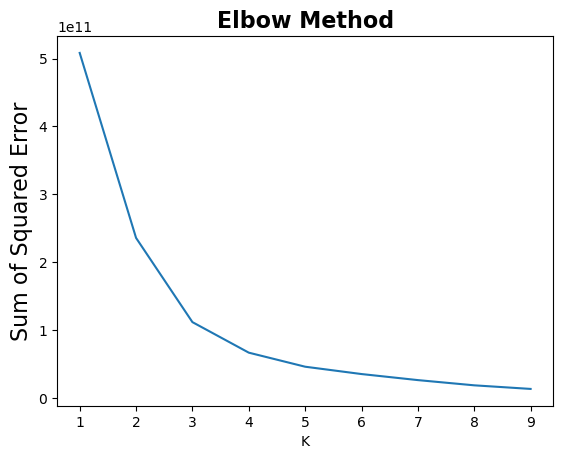

In [22]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dataset)
    sse.append(km.inertia_)

plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error', fontsize=16)
plt.title('Elbow Method', fontfamily='sans-serif', fontsize=16, fontweight="bold")

**Silhouette Method**

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
sil = []
kmax_rng = range(2, 10)

# minimum number of clusters should be 2
for k in kmax_rng:
    kmeans = KMeans(n_clusters = k).fit(dataset)
    labels = kmeans.labels_
    sil.append(silhouette_score(dataset, labels, metric = 'euclidean'))

Text(0.5, 1.0, 'Silhouette Method')

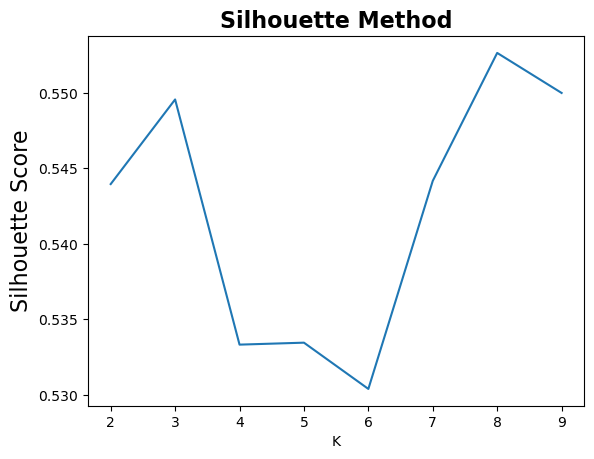

In [25]:
plt.plot(kmax_rng, sil)
plt.xlabel('K')
plt.ylabel('Silhouette Score', fontsize=16)
plt.title('Silhouette Method', fontfamily='sans-serif', fontsize=16, fontweight="bold")

The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.

**Clustering**

In [44]:
# Modeling
model = KMeans(n_clusters=3)
y_pred = model.fit_predict(dataset)

# add cluster to new column
df['cluster'] = y_pred

In [45]:
df['cluster'].value_counts()

0    67
2    48
1    10
Name: cluster, dtype: int64

In [46]:
df = df.reset_index(drop=True)

In [47]:
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,"""45""",Handwritten,The Gaslight Anthem,2012-01-01,202493,55,0.000696,0.315,0.970,0.000000,0.2770,-4.709,0.1020,178.068,4,2
1,"1,000 Years",Get Hurt,The Gaslight Anthem,2014-08-12,218706,29,0.006170,0.334,0.896,0.000033,0.0763,-4.844,0.0463,131.812,5,0
2,A Quick Death in Texas,Psychic Warfare,Clutch,2015-10-02,237451,46,0.057500,0.590,0.925,0.000000,0.3640,-5.622,0.0479,93.944,4,0
3,A Tornado Warning,A Long Way from Your Heart,Turnpike Troubadours,2017-10-20,223365,60,0.002530,0.478,0.833,0.000063,0.0567,-5.194,0.0355,141.976,4,0
4,Alive,Half Drunk Under a Full Moon (Deluxe),The Fratellis,2022-04-22,245080,31,0.079900,0.555,0.865,0.000000,0.2520,-5.409,0.0396,123.065,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,bangbangbang,bangbangbang,Deal Casino,2019-08-02,392970,46,0.004480,0.300,0.646,0.345000,0.4650,-12.712,0.0421,83.381,4,1
121,concussion,concussion,girlhouse,2021-08-27,277142,55,0.801000,0.554,0.477,0.005520,0.0944,-8.335,0.0247,167.973,4,0
122,i miss myself,i miss myself,renforshort,2022-06-23,222400,0,0.135000,0.426,0.404,0.000631,0.1030,-7.338,0.0322,149.739,4,0
123,not my friend,dear amelia,renforshort,2022-07-08,167441,24,0.845000,0.521,0.370,0.000043,0.1890,-10.043,0.1310,171.952,4,2


<Figure size 1200x1200 with 0 Axes>

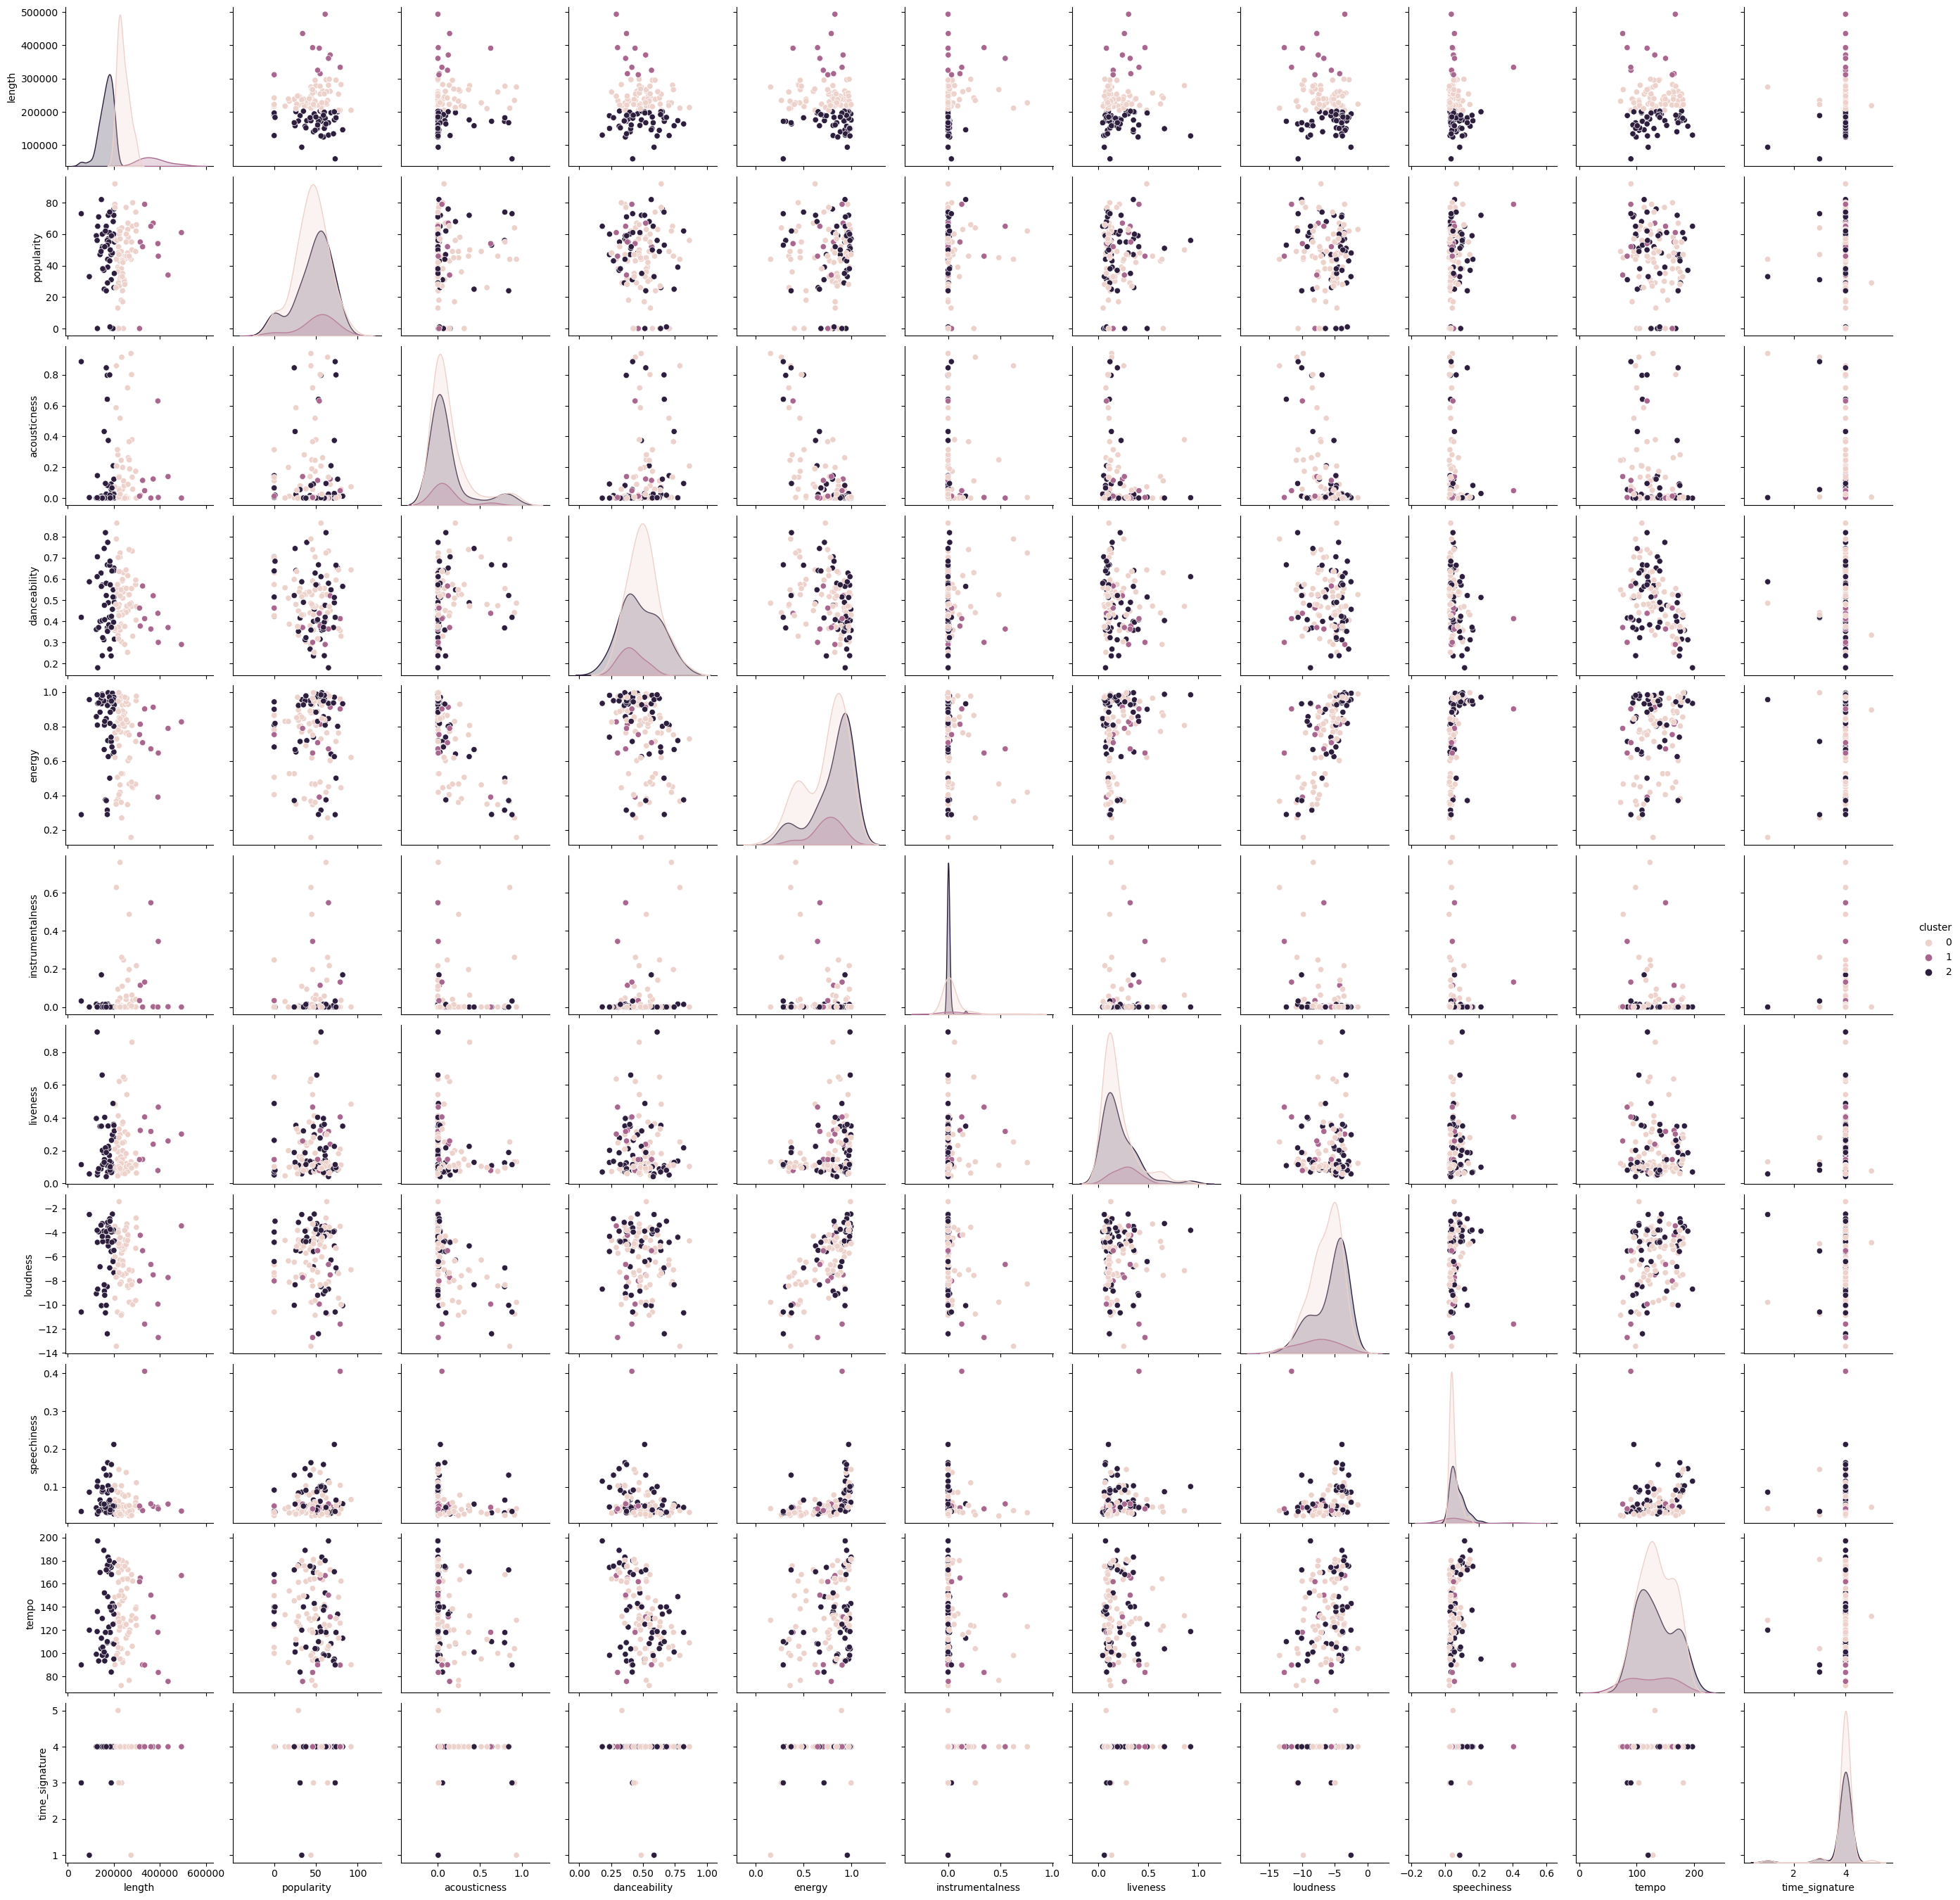

In [48]:
plt.figure(figsize=(12,12))
sns.pairplot(data=df, hue='cluster')

**Identify the clusters**

In [49]:
grouped_df = df.groupby('cluster')

In [50]:
mean_df = grouped_df.mean()

In [51]:
mean_df = mean_df.reset_index()

In [52]:
mean_df

,cluster,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,240716.58209,44.880597,0.139241,0.503761,0.729866,0.052560,0.195682,-6.337612,0.049367,133.859313,3.940299
1,1,372993.80000,51.300000,0.109312,0.409700,0.740800,0.117513,0.268110,-7.736400,0.081980,123.225600,4.000000
2,2,166986.43750,47.354167,0.121342,0.482417,0.812250,0.005964,0.203894,-5.643229,0.070775,133.368458,3.895833
